# URL Classification
## Data Preprocessing


This notebook includes:

1. Exploratory Data Analysis
2. Data Cleaning
3. Feature Engineering


----
## Exploratory Data Analysis


In [26]:
pip install webdriver-manager


  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
selenium 4.3.0 requires urllib3[secure,socks]~=1.26, but you'll have urllib3 1.25.11 which is incompatible.
You should consider upgrading via the 'C:\Users\EL7md\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
pip install selenium

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.8
    Uninstalling urllib3-1.25.8:
      Successfully uninstalled urllib3-1.25.8
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
requests 2.22.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.11 which is incompatible.
You should consider upgrading via the 'C:\Users\EL7md\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\EL7md\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import re
from translate import Translator
from nltk.corpus import names
import datetime
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sqlalchemy import create_engine
from selenium import webdriver
#from BeautifulSoup import BeautifulSoup
from bs4 import BeautifulSoup
import requests 
from requests.adapters import HTTPAdapter, Retry


# Pretty display for notebooks
%matplotlib inline


In [2]:
# Load dataset
df = pd.read_csv("dataset/URL Classification.csv",index_col = 0)
df.columns=['url','type']
# display the dataset
df.head()


C:\Users\EL7md\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,url,type
1,,
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult
6,http://www.animehouse.com/,Adult


In [3]:
# print the shape of the dataset
df.shape

(1562977, 2)

In [4]:
# print the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562977 entries, 2 to 1562978
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1562974 non-null  object
 1   type    1562977 non-null  object
dtypes: object(2)
memory usage: 35.8+ MB


In [5]:
# check missing values
df.isnull().sum()

url     3
type    0
dtype: int64

In [6]:
# check if there is a duplicates
df.duplicated().sum()

22493

In [7]:
# print the statistical descriptive
df.describe()

,url,type
count,1562974,1562977
unique,1515222,15
top,http://www.hiddenforest.co.nz/fungi/family/plu...,Arts
freq,7,253840


In [9]:
# save the dataset
df.to_csv('URLClassification.csv')

### Data visualization

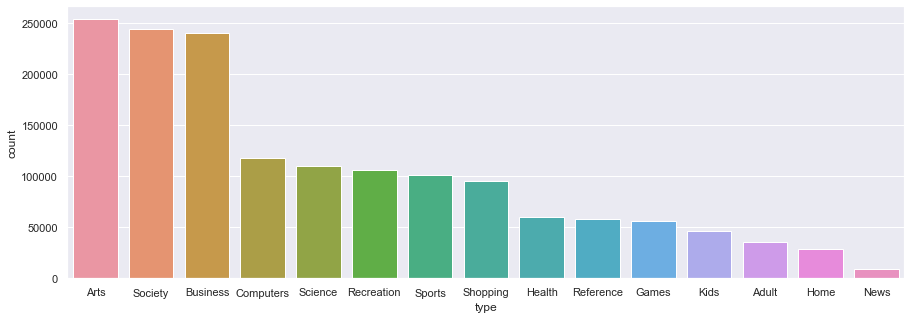

In [8]:
# visualize the type column
sb.set(rc={'figure.figsize':(15,5)})

sb.countplot(data=df,x='type',order=df['type'].value_counts().index)

### Data Cleaning


In [8]:
# remove missing values
df.dropna(inplace=True)

In [9]:
# check there is no null values
df.isnull().sum()

url     0
type    0
dtype: int64

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# check the duplicates
df.duplicated().sum()

0

In [12]:
# check the df shape
df.shape

(1540481, 2)

In [13]:
# change the data type of type column
df['type']=df['type'].astype('string')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540481 entries, 2 to 1562978
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1540481 non-null  object
 1   type    1540481 non-null  string
dtypes: object(1), string(1)
memory usage: 35.3+ MB


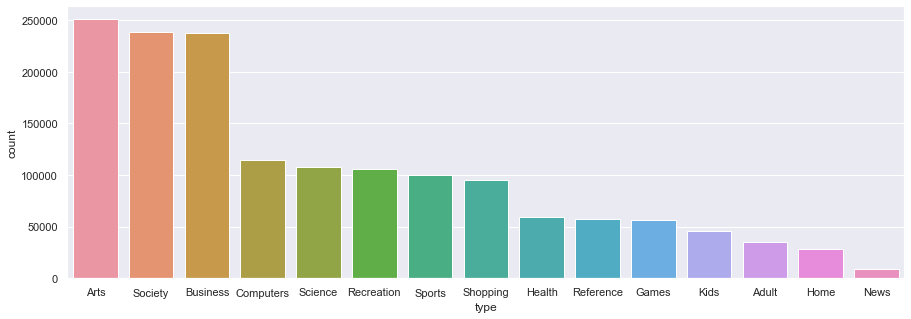

In [23]:
# visualize the type column
sb.set(rc={'figure.figsize':(15,5)})

sb.countplot(data=df,x='type',order=df['type'].value_counts().index)

### Feature Engineering

In [41]:
# extract text
def fextract(curl):
    
    text=[]

    for u in curl:
        # open the u "url"    
        # extract the title and body
        soup = BeautifulSoup(requests.get(u).content, "html.parser")
         # Finding the text:
        text.append(soup.find_all(text=True)) 
        
    return text
    

In [43]:
# apply fextract function
text=fextract(df['url'])
text